Ankit Ajay Mandpe <br>
B21CH002
<br>
Modeling Assignment

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
train_data = loadmat(r"Training_Data_Four_Tanks.mat")
test_data = loadmat(r"Testing_Data_Four_Tanks.mat")

In [3]:
train_input_data = pd.DataFrame(train_data['input_data'],columns = ['V1','V2'])  #input features from the data
train_output_data = pd.DataFrame(train_data['output_data'],columns =['h1','h2']) #output i.e. target features
train_time_span = pd.DataFrame(train_data['time_span'],columns=['time']) #time span

In [4]:
test_input_data = pd.DataFrame(test_data['input_data'],columns = ['V1','V2']) #input features from the data
test_output_data = pd.DataFrame(test_data['output_data'],columns =['h1','h2']) #output i.e. target features
test_time_span = pd.DataFrame(test_data['time_span'],columns=['time']) #time span

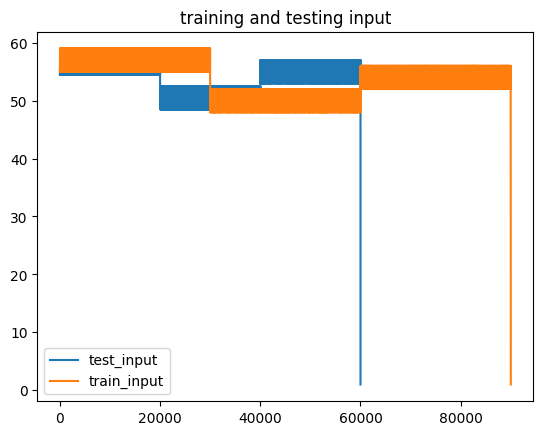

In [5]:
plt.plot(test_input_data['V1'], label='test_input')
plt.plot(train_input_data['V1'], label = 'train_input')
plt.title("training and testing input")
plt.legend()
plt.show()

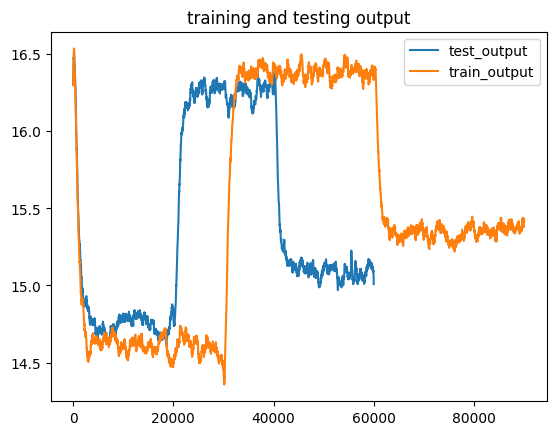

In [6]:
plt.plot(test_output_data['h1'], label='test_output')
plt.plot(train_output_data['h1'], label = 'train_output')
plt.title("training and testing output")
plt.legend()
plt.show()

#Train a) RNN model and b) LSTM model. Compare the accuracy of the trained model on validation data set.

SimpleRNN

In [8]:
X_train = train_input_data.values
y_train = train_output_data.values

In [11]:
# Define the RNN model
model_RNN = Sequential([
    SimpleRNN(64, input_shape=(None, X_train.shape[1]), return_sequences=True),
    SimpleRNN(64),
    Dense(y_train.shape[1])  # Output dimension should match the number of columns in output
])

In [12]:
# Compile the model
model_RNN.compile(optimizer='adam', loss='mae')

In [13]:
# Train the model
model_RNN.fit(X_train.reshape(X_train.shape[0], 1, X_train.shape[1]), y_train, epochs=15, batch_size=32)

Epoch 1/15
2813/2813 [==============================] - 10s 3ms/step - loss: 0.6293
Epoch 2/15
2813/2813 [==============================] - 7s 3ms/step - loss: 0.2840
Epoch 3/15
2813/2813 [==============================] - 7s 2ms/step - loss: 0.2352
Epoch 4/15
2813/2813 [==============================] - 8s 3ms/step - loss: 0.2338
Epoch 5/15
2813/2813 [==============================] - 6s 2ms/step - loss: 0.2327
Epoch 6/15
2813/2813 [==============================] - 8s 3ms/step - loss: 0.2324
Epoch 7/15
2813/2813 [==============================] - 7s 2ms/step - loss: 0.2314
Epoch 8/15
2813/2813 [==============================] - 7s 3ms/step - loss: 0.2309
Epoch 9/15
2813/2813 [==============================] - 7s 3ms/step - loss: 0.2311
Epoch 10/15
2813/2813 [==============================] - 6s 2ms/step - loss: 0.2297
Epoch 11/15
2813/2813 [==============================] - 7s 3ms/step - loss: 0.2296
Epoch 12/15
2813/2813 [==============================] - 7s 2ms/step - loss: 0.2286


In [14]:
X_test = test_input_data.values
y_test = test_output_data.values

In [16]:
# evaluate model on test set
mae = model_RNN.evaluate(X_test.reshape(X_test.shape[0], 1, X_test.shape[1]),y_test)
mae

1876/1876 [==============================] - 6s 2ms/step - loss: 0.2867


0.28665101528167725

LSTM

In [18]:
from tensorflow.keras.layers import LSTM, Dense

In [19]:
# Define the LSTM model
model_LSTM = Sequential([
    LSTM(64, input_shape=(None, X_train.shape[1]), return_sequences=True),
    LSTM(64),
    Dense(y_train.shape[1])  # Output dimension should match the number of columns in output
])

In [20]:
# Compile the model
model_LSTM.compile(optimizer='adam', loss='mae')

In [21]:
# Train the model
model_LSTM.fit(X_train.reshape(X_train.shape[0], 1, X_train.shape[1]), y_train, epochs=15, batch_size=32)

Epoch 1/15
2813/2813 [==============================] - 16s 4ms/step - loss: 0.8379
Epoch 2/15
2813/2813 [==============================] - 12s 4ms/step - loss: 0.3443
Epoch 3/15
2813/2813 [==============================] - 11s 4ms/step - loss: 0.3424
Epoch 4/15
2813/2813 [==============================] - 11s 4ms/step - loss: 0.3292
Epoch 5/15
2813/2813 [==============================] - 11s 4ms/step - loss: 0.2470
Epoch 6/15
2813/2813 [==============================] - 11s 4ms/step - loss: 0.2334
Epoch 7/15
2813/2813 [==============================] - 11s 4ms/step - loss: 0.2323
Epoch 8/15
2813/2813 [==============================] - 12s 4ms/step - loss: 0.2327
Epoch 9/15
2813/2813 [==============================] - 11s 4ms/step - loss: 0.2318
Epoch 10/15
2813/2813 [==============================] - 11s 4ms/step - loss: 0.2320
Epoch 11/15
2813/2813 [==============================] - 11s 4ms/step - loss: 0.2314
Epoch 12/15
2813/2813 [==============================] - 12s 4ms/step - lo

In [22]:
# evaluate model on test set
mae_LSTM = model_LSTM.evaluate(X_test.reshape(X_test.shape[0], 1, X_test.shape[1]),y_test)
mae_LSTM

1876/1876 [==============================] - 5s 2ms/step - loss: 0.2626


0.26258793473243713

SimpleRNN model Evaluated MAE score is : 0.28665101528167725 <br>
LSTM model Evaluated MAE score is : 0.26258793473243713

As can be seen, the loss values of both models are rather comparable.<br>
Conclusion:  <br>

*   As the Sequential data does not have that much complexity, that can be
beniffited by LSTM.
*   If both models are initialized with the initialization method is not sensitive to the architecture difference between SimpleRNN and LSTM, they may converge to similar solutions.




#Train three RNN/LSTM models corresponding to three operating conditions of the plant and use logical if else loop to infer the final response

In [70]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [71]:
# Calculate the number of rows per part
total_rows = train_input_data.shape[0]
rows_per_part = total_rows // 3

# Split the input DataFrame into three equal parts
input_part1 = train_input_data.iloc[:rows_per_part]
input_part2 = train_input_data.iloc[rows_per_part:2*rows_per_part]
input_part3 = train_input_data.iloc[2*rows_per_part:]

#Split the Output DataFrame into three equal parts
y_part1 = train_output_data.iloc[0:rows_per_part]
y_part2 = train_output_data.iloc[rows_per_part:2*rows_per_part]
y_part3 = train_output_data.iloc[2*rows_per_part:total_rows]

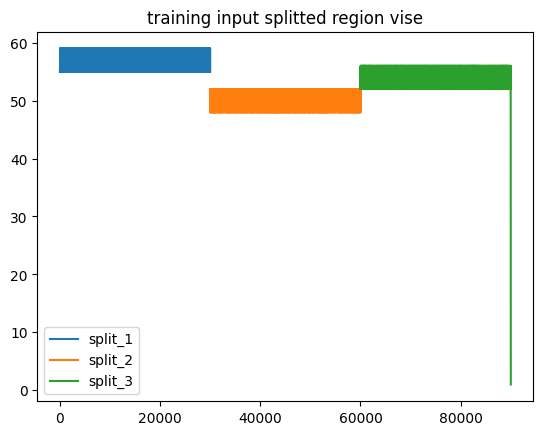

In [72]:
plt.plot(input_part1['V1'], label='split_1')
plt.plot(input_part2['V1'], label = 'split_2')
plt.plot(input_part3['V1'], label = 'split_3')
plt.title("training input splitted region vise")
plt.legend()
plt.show()

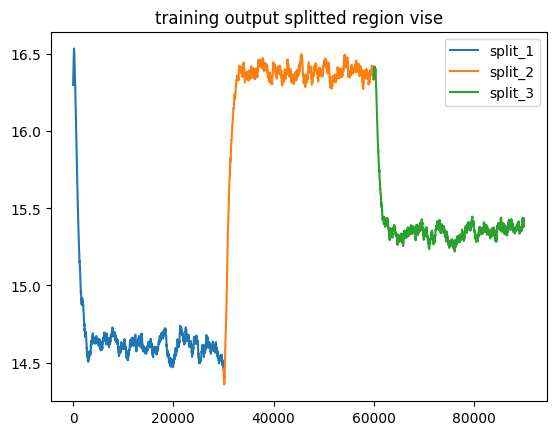

In [73]:
plt.plot(y_part1['h1'], label='split_1')
plt.plot(y_part2['h1'], label = 'split_2')
plt.plot(y_part3['h1'], label = 'split_3')
plt.title("training output splitted region vise")
plt.legend()
plt.show()

In [74]:
train_i_1 = input_part1.values
train_i_2 = input_part2.values
train_i_3 = input_part3.values

In [75]:
train_o_1 = y_part1.values
train_o_2 = y_part2.values
train_o_3 = y_part3.values

In [102]:
# Define the RNN model for partial
model_RNN = Sequential([
    LSTM(64, input_shape=(None, X_train.shape[1]), return_sequences=True),
    LSTM(64),
    Dense(y_train.shape[1])  # Output dimension should match the number of columns in output
])

In [103]:
# Compile the model
model_RNN.compile(optimizer='adam', loss='mae')

In [104]:
# Define the LSTM model for partial
model_LSTM = Sequential([
    LSTM(64, input_shape=(None, X_train.shape[1]), return_sequences=True),
    LSTM(64),
    Dense(y_train.shape[1])  # Output dimension should match the number of columns in output
])

In [79]:
# Compile the model
model_LSTM.compile(optimizer='adam', loss='mae')

In [105]:
# Train the modeltrain
model_1 = model_RNN.fit(train_i_1.reshape(train_i_1.shape[0], 1, train_i_1.shape[1],), train_o_1, epochs=10, batch_size=32)

Epoch 1/10
938/938 [==============================] - 7s 4ms/step - loss: 1.3831
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1080
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1082
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1082
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1082
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1082
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1080
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1082
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1079
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1085


In [81]:
model_2 = model_LSTM.fit(train_i_2.reshape(train_i_2.shape[0], 1, train_i_2.shape[1]), train_o_2, epochs=10, batch_size=32)

Epoch 1/10
938/938 [==============================] - 7s 4ms/step - loss: 1.3733
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1056
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1059
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1058
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1055
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1059
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1057
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1058
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1056
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1058


In [82]:
model_3 = model_RNN.fit(train_i_3.reshape(train_i_3.shape[0], 1, train_i_3.shape[1]), train_o_3, epochs=10, batch_size=32)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0746
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0674
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0674
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0672
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0671
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0670
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0674
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0675
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0671
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0672


In [108]:
X_test = test_input_data.values
y_test = test_output_data.values

In [109]:
predictions = []

In [ ]:
for i in X_test:
  # Make predictions using each model
    prediction_condition1 = model_1.predict(np.array([i]))[0]
    prediction_condition2 = model_2.predict(np.array([i]))[0]
    prediction_condition3 = model_3.predict(np.array([i]))[0]
  # Use logical if-else loop to infer the final response
    if prediction_condition1 > prediction_condition2 and prediction_condition1 > prediction_condition3:
        final_prediction = prediction_condition1
    elif prediction_condition2 > prediction_condition1 and prediction_condition2 > prediction_condition3:
        final_prediction = prediction_condition2
    else:
        final_prediction = prediction_condition3
  # Append the final prediction to the list of predictions
    predictions.append(final_prediction)


In [ ]:
# Convert predictions to numpy array
predictions = np.array(predictions)

In [ ]:
# Evaluate the model
mae = np.abs((y_test[0] - predictions[0].flatten()))
print("Mean Abs Error:", mae)

As the Method Applied according the question: <br>

1.   Modeling the range

*   Split the Dataset according to region, as region is equally devided splitting will also be devided equally in 3 region
*   Model every sequence region with different models

2.   Using if-else infer the final response
*   for every element i in X_test data
*   Use if-else to infer final response the data
*   And accordingly append the predicted value in predictions

3. Accuracy will be Calculated by 'mean absolute error'<br>
 error = mean(abs(y_test - predictions))










Conclusion:
<br>
<br>
*   By training separate models for each operating condition, the models can capture the unique patterns and characteristics specific to each condition. This allows for more accurate predictions tailored to the current state of the plant.
*    The model can dynamically choose the appropriate response depending on the prevailing operating condition, enhancing the plant's responsiveness and efficiency.
*   Having multiple models trained on different operating conditions enhances the robustness of the system.
*  This approach is scalable and can be extended to accommodate additional operating conditions or refine existing models as more data becomes available.



#Train and validate the accuracy of a Neuro-Fuzzy model where in the three RNN/LSTM models trained in earlier part will be used as individual models in the corresponding region of operating conditions.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense
from tensorflow.keras.models import Model

In [59]:
# Custom Fuzzy Layer
class FuzzyLayer(Layer):
    def __init__(self, output_dim, **kwargs):
        super(FuzzyLayer, self).__init__(**kwargs)
        self.output_dim = output_dim

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[1], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)

    def call(self, x):
        return tf.math.sigmoid(tf.matmul(x, self.kernel))


In [60]:
# Neural Network Model
input_layer = Input(shape=(2,))
fuzzy_layer = FuzzyLayer(10)(input_layer)
hidden_layer = Dense(10, activation='relu')(fuzzy_layer)
output_layer = Dense(2)(hidden_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mae')

In [61]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mae')

In [62]:
# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=10, verbose=1)

Epoch 1/15
9001/9001 [==============================] - 15s 2ms/step - loss: 0.7088
Epoch 2/15
9001/9001 [==============================] - 15s 2ms/step - loss: 0.3496
Epoch 3/15
9001/9001 [==============================] - 15s 2ms/step - loss: 0.3494
Epoch 4/15
9001/9001 [==============================] - 14s 2ms/step - loss: 0.3487
Epoch 5/15
9001/9001 [==============================] - 14s 2ms/step - loss: 0.3475
Epoch 6/15
9001/9001 [==============================] - 14s 2ms/step - loss: 0.3472
Epoch 7/15
9001/9001 [==============================] - 15s 2ms/step - loss: 0.3462
Epoch 8/15
9001/9001 [==============================] - 14s 2ms/step - loss: 0.3455
Epoch 9/15
9001/9001 [==============================] - 14s 2ms/step - loss: 0.3447
Epoch 10/15
9001/9001 [==============================] - 14s 2ms/step - loss: 0.3440
Epoch 11/15
9001/9001 [==============================] - 14s 2ms/step - loss: 0.3436
Epoch 12/15
9001/9001 [==============================] - 14s 2ms/step - lo

In [68]:
X_test.shape

(60001, 2)

In [69]:
# Evaluate the model
predictions = model.predict(X_test)
mae = np.abs((y_test[0] - predictions[0].flatten()))
print("Mean Abs Error:", mae)

1876/1876 [==============================] - 2s 1ms/step
Mean Squared Error: [1.59794502 1.49830513]


*  Build a Fuzzy Neural Network Model: Implementing a fuzzy logic layer in a neural network.
*  Train the Model: Use the dataset to train the model.

The architecture of a fuzzy neural network typically consists of several layers: an input layer, one or more hidden layers, and an output layer. <br>
The input layer receives the raw data, which is then processed through the hidden layers using fuzzy logic operators. The output layer provides the final decision or prediction, often in a fuzzy format that is then defuzzified for practical use.

The integration of fuzzy logic into neural networks brings the advantage of handling uncertain, noisy, or incomplete data, which is a common challenge in real-world scenarios. <br>
But in the given problem it is higly predictable that cant be much benifitted by Neuro-fuzzy model. <br>

